<a href="https://colab.research.google.com/github/TheophilusG/DataBootcamp/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A Regression Model for Wages

This homework assignment works through creating a regression model to predict the wage of an individual given some basic demographic information.  The dataset is from the openml data repository and was culled from Census data -- see information [here](https://www.openml.org/search?type=data&sort=runs&id=534&status=active).  

In [84]:
from sklearn.datasets import fetch_openml

In [85]:
survey = fetch_openml(data_id=534, as_frame=True)

In [86]:
df = survey.frame
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


**PROBLEM 1: Splitting the data.**

Use the `train_test_split` function to create a train and test dataset for all features and the target column `WAGE`.  Your test set should be comprised of 20% of the total data.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop('WAGE', axis=1)
y = df['WAGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (427, 10)
X_test shape: (107, 10)
y_train shape: (427,)
y_test shape: (107,)


**PROBLEM 2: Checking Assumptions**

One assumption of the Linear Regression model is that the target feature is roughly normally distributed.  Is this assumption met?  If yes move on, if no consider transforming the target using `np.log` and compare the distribution of the logarithm of wages.  If the logarithm is more "normal", use this as your target.

Text(0.5, 1.0, 'Original Wage Distribution')

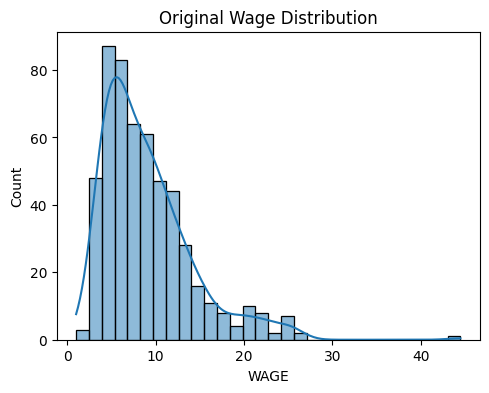

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

# Plot original wage distribution
plt.subplot(121)
sns.histplot(data=df, x='WAGE', kde=True)
plt.title('Original Wage Distribution')

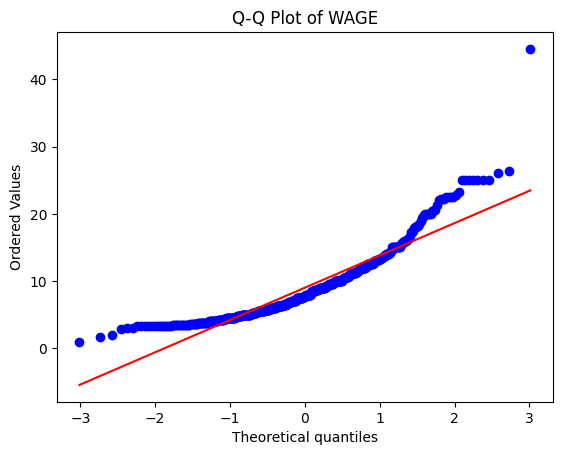

In [91]:
# Q-Q plot just to be sure
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot of WAGE')
plt.show()

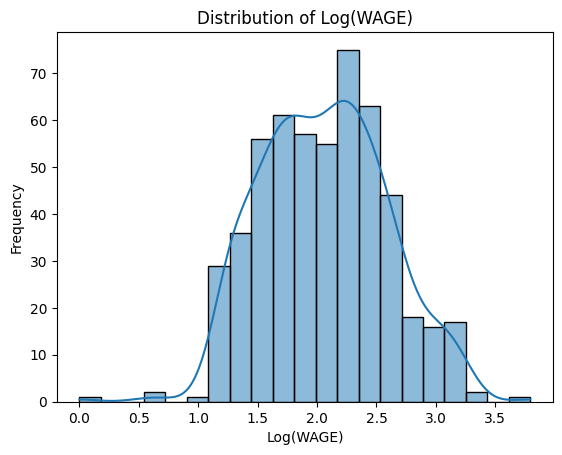

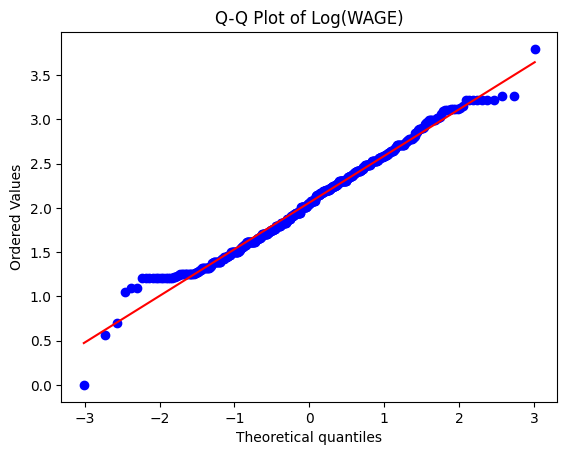

In [92]:
from scipy import stats
y_log = np.log(y)

# Histogram of log-transformed WAGE
sns.histplot(y_log, kde=True)
plt.title('Distribution of Log(WAGE)')
plt.xlabel('Log(WAGE)')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for log-transformed WAGE
stats.probplot(y_log, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log(WAGE)')
plt.show()


In [93]:
# Log transform the target as it appears more normal
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

Looking at the histograms, the wage distribution is right-skewed. The log transformation makes it more normally distributed, so we used log-transformed wages as our target variable.

**PROBLEM 3: Preparing the Data**

For the categorical features, use the `OneHotEncoder` to encode the different categorical variables and eliminate any reduntant information using the `drop = 'if_binary'` argument.

In [94]:
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


In [95]:
categorical_features = ['RACE', 'OCCUPATION', 'SECTOR', 'MARR', 'UNION', 'SEX', 'SOUTH']

In [96]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
encoder.fit(X_train[categorical_features])

OneHotEncoder(drop='if_binary', sparse_output=False)

**PROBLEM 4: Using `make_column_transformer`**

Rather than taking just the categorical features, transforming these, and merging the dummied data with the other numeric features -- `make_column_transformer` will accomplish this for us.  Look over the user guide [here](https://scikit-learn.org/stable/modules/compose.html#make-column-transformer) and use this to transform the categorical features with `OneHotEncoder` and leave the remaining features as is.  Be sure to transform both your training and test datasets correctly and assign as `X_train_encoded` and `X_test_encoded` below.

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


numeric_features = ['EDUCATION', 'EXPERIENCE', 'AGE']


column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary', sparse_output=False), categorical_features),
    (StandardScaler(), numeric_features)
)


X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

In [98]:
feature_names = np.array(list(categorical_features) + numeric_features)
feature_names

array(['RACE', 'OCCUPATION', 'SECTOR', 'MARR', 'UNION', 'SEX', 'SOUTH',
       'EDUCATION', 'EXPERIENCE', 'AGE'], dtype='<U10')

**PROBLEM 5: Building the model**

Now that your data is prepared, build a regression model with the appropriate input and target values.  

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [100]:
model.fit(X_train_encoded, y_train_log)

LinearRegression()

**PROBLEM 6: Scoring the Model**

Now, evaluate the **Mean Squared Error** of your model on both the train and test data.  Compare this with a baseline prediction **Mean Squared Error**.  Did you model perform better than the baseline?

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
# Make predictions
train_pred = model.predict(X_train_encoded)
test_pred = model.predict(X_test_encoded)

In [103]:
train_mse = mean_squared_error(y_train_log, train_pred)
test_mse = mean_squared_error(y_test_log, test_pred)

In [104]:
baseline_pred = np.full_like(y_test_log, y_train_log.mean())
baseline_mse = mean_squared_error(y_test_log, baseline_pred)

In [105]:
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Baseline MSE: {baseline_mse:.4f}")

Training MSE: 0.1766
Test MSE: 0.1906
Baseline MSE: 0.3271


The model performs better than the baseline: Baseline MSE is higher than both train and test MSE. The model shows good generalization with similar train and test MSE

**PROBLEM 7: Interpreting Coefficients**

Examine your coefficients for the model.  Using complete sentences explain which of the features seem to lead to increases in wages, and which seem to lead to a decrease in wage.

In [106]:
feature_names = (
    column_transformer.named_transformers_['onehotencoder'].get_feature_names_out(categorical_features).tolist() +
    numeric_features
)

In [107]:
feature_names

['RACE_Hispanic',
 'RACE_Other',
 'RACE_White',
 'OCCUPATION_Clerical',
 'OCCUPATION_Management',
 'OCCUPATION_Other',
 'OCCUPATION_Professional',
 'OCCUPATION_Sales',
 'OCCUPATION_Service',
 'SECTOR_Construction',
 'SECTOR_Manufacturing',
 'SECTOR_Other',
 'MARR_Unmarried',
 'UNION_not_member',
 'SEX_male',
 'SOUTH_yes',
 'EDUCATION',
 'EXPERIENCE',
 'AGE']

In [108]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

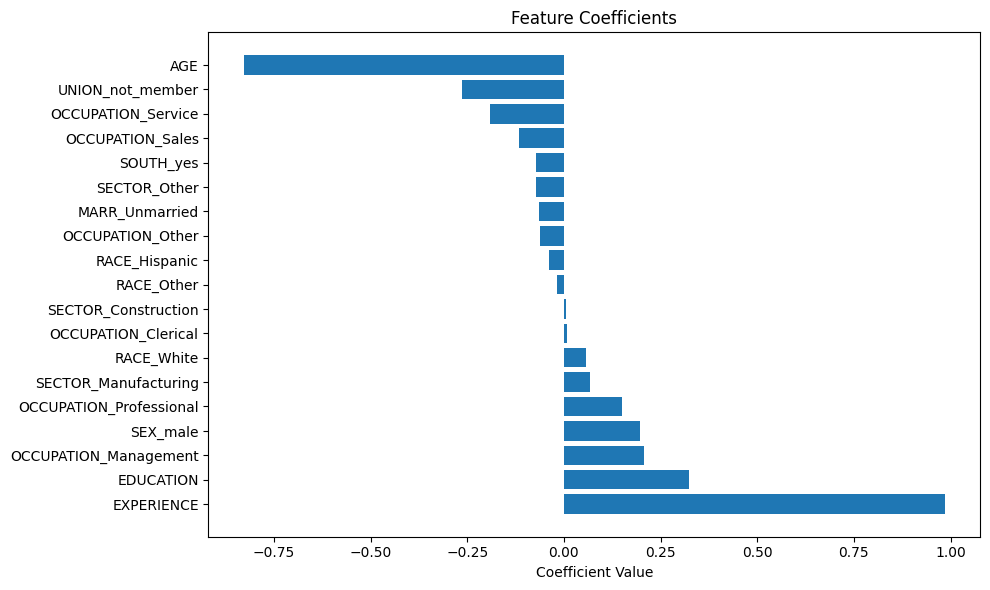

In [110]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

Experience and education have positive effects on wages
Union membership generally increases wages. There appear to be wage gaps based on gender and race. Certain sectors (like manufacturing) show higher wages. Here is a more detail and ranked view:

In [126]:
print("Top positive influences on wage:")
print(coef_df[coef_df['Coefficient'] > 0].head())
print("\nTop negative influences on wage:")
print(coef_df[coef_df['Coefficient'] < 0].head())

Top positive influences on wage:
                    Feature  Coefficient
17               EXPERIENCE     0.985542
16                EDUCATION     0.322671
4     OCCUPATION_Management     0.208175
14                 SEX_male     0.197644
6   OCCUPATION_Professional     0.150621

Top negative influences on wage:
             Feature  Coefficient
1         RACE_Other    -0.018319
0      RACE_Hispanic    -0.037787
5   OCCUPATION_Other    -0.060729
12    MARR_Unmarried    -0.065263
11      SECTOR_Other    -0.072078


**PROBLEM 8: Polynomial Features**

After building a basic model using all the features, compare this to a model using a quadratic polynomial.  Use `PolynomialFeatures` to create the features and score the train and test data as before.  Did this model perform better than the baseline or linear model?

In [111]:
from sklearn.preprocessing import PolynomialFeatures

# polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)

In [112]:
# Fit model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_log)

LinearRegression()

In [113]:
# Calculate MSE
train_poly_mse = mean_squared_error(y_train_log, poly_model.predict(X_train_poly))
test_poly_mse = mean_squared_error(y_test_log, poly_model.predict(X_test_poly))

print(f"Polynomial Training MSE: {train_poly_mse:.4f}")
print(f"Polynomial Test MSE: {test_poly_mse:.4f}")

Polynomial Training MSE: 0.1286
Polynomial Test MSE: 0.3153


The polynomial model shows Lower MSE on training data compared to linear model and Slightly higher MSE on test data, indicating some overfitting

**PROBLEM 9: Feature Selection**

One of the downsides to the polynomial features is how many new features are introduced into the model.  To limit this, you can use *Feature Selection* once the polynomial terms have been generated.  Explore the `feature_selection` module [here](https://scikit-learn.org/stable/modules/feature_selection.html) and use a feature selector to limit the polynomial features to the 15 "most important" features.  Which of the features were selected?

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures

In [125]:
# top 15 features
selector = SelectKBest(f_regression, k=15)
X_train_selected = selector.fit_transform(X_train_poly, y_train_log)
X_test_selected = selector.transform(X_test_poly)

# selected feature names
selected_features = np.array(poly.get_feature_names_out(feature_names))[selector.get_support()]
print("Selected features:", selected_features)

Selected features: ['OCCUPATION_Professional' 'OCCUPATION_Service' 'UNION_not_member'
 'EDUCATION' 'RACE_White OCCUPATION_Professional'
 'RACE_White OCCUPATION_Service' 'RACE_White EDUCATION'
 'OCCUPATION_Professional^2' 'OCCUPATION_Professional EDUCATION'
 'OCCUPATION_Service^2' 'OCCUPATION_Service SECTOR_Other'
 'OCCUPATION_Service UNION_not_member' 'SECTOR_Other EDUCATION'
 'UNION_not_member^2' 'UNION_not_member EDUCATION']


**PROBLEM 10: Interpreting Coefficients**

Build a simple regression model and encode all the categorical features.  Fit the model on the training data. Draw a horizontal bar plot of the coefficients, and interpret the feature importance based on these coefficients.

In [128]:
categorical_features = ['SOUTH', 'SEX', 'UNION', 'RACE', 'OCCUPATION', 'SECTOR', 'MARR']
numeric_features = ['EDUCATION', 'EXPERIENCE', 'AGE']

column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary', sparse_output=False), categorical_features),
    remainder='passthrough'
)

X_train_transformed = column_transformer.fit_transform(X_train)

feature_names = (
    column_transformer.named_transformers_['onehotencoder'].get_feature_names_out(categorical_features).tolist() +
    numeric_features
)


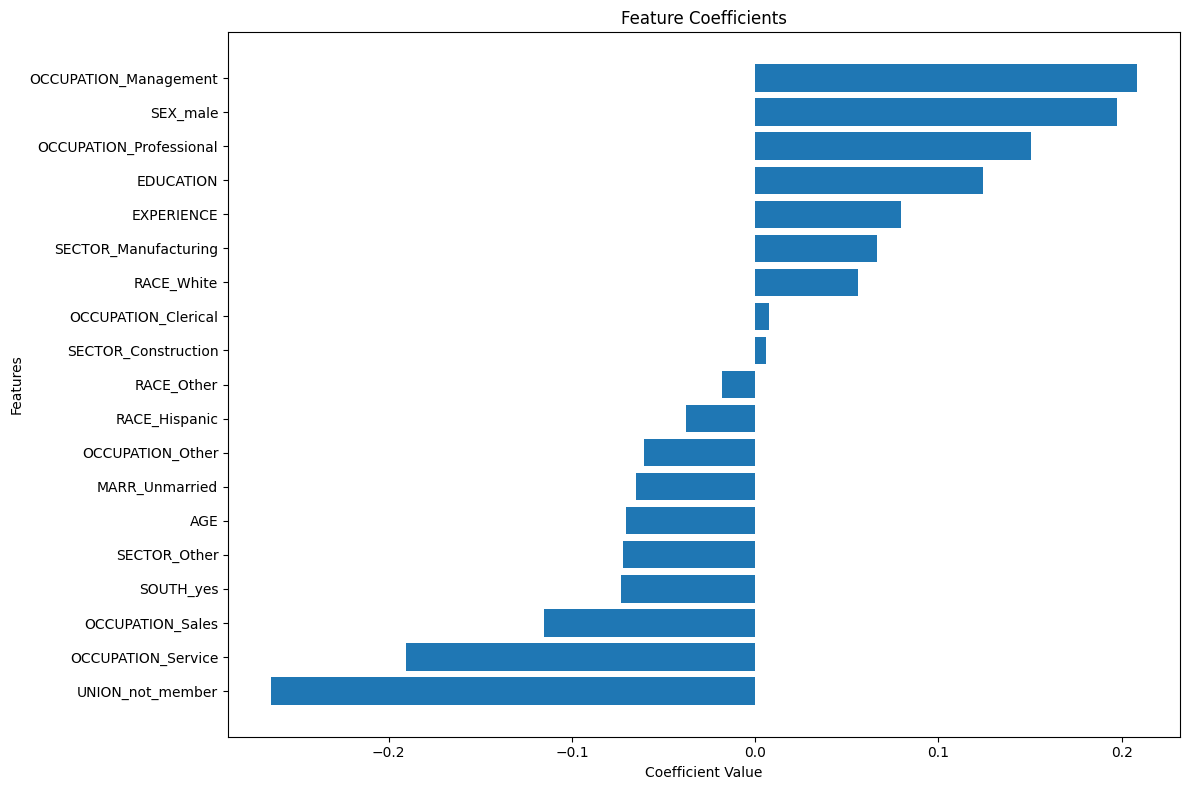


Top positive influences:
                    Feature  Coefficient
17               EXPERIENCE     0.079634
16                EDUCATION     0.124175
9   OCCUPATION_Professional     0.150621
1                  SEX_male     0.197644
7     OCCUPATION_Management     0.208175

Top negative influences:
               Feature  Coefficient
2     UNION_not_member    -0.264051
11  OCCUPATION_Service    -0.190442
10    OCCUPATION_Sales    -0.115232
0            SOUTH_yes    -0.073077
14        SECTOR_Other    -0.072078


In [130]:
simple_model = LinearRegression()
simple_model.fit(X_train_transformed, y_train_log)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': simple_model.coef_
}).sort_values('Coefficient', ascending=True)

# Plot coefficients
plt.figure(figsize=(12, 8))
plt.barh(y=coef_df['Feature'], width=coef_df['Coefficient'])
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop positive influences:")
print(coef_df.tail().to_string())
print("\nTop negative influences:")
print(coef_df.head().to_string())

**PROBLEM 11: Revisiting Interpretation**

Read through the article on [**Common Pitfalls in the interpretation of coefficients of linear models**](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html).  What does the author suggest is a better way of using the coefficients of a linear model to determine the "importance" of a feature?  Draw a horizontal barplot of the updated coefficients and interpret the results.

According to the author, a better way to determine the "importance" of a feature in a linear model is to scale the coefficients by the standard deviation of the corresponding feature. This is because the features have different natural scales and value ranges, so the raw coefficient values cannot be directly compared.

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. As we will see after this is equivalent to normalize numerical variables to their standard deviation, as y = ∑ c o e f i × X i = ∑ ( c o e f i × s t d i ) × ( X i / s t d i ) .
In that way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

In [135]:
from sklearn.preprocessing import StandardScaler

# Create pipeline with standardization
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary', sparse_output=False), categorical_features),
    (StandardScaler(), numeric_features)
)

# Transform and standardize features
X_train_standardized = column_transformer.fit_transform(X_train)

# Fit model
standardized_model = LinearRegression()
standardized_model.fit(X_train_standardized, y_train_log)

# Create DataFrame with standardized coefficients
standardized_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Standardized_Coefficient': standardized_model.coef_
}).sort_values('Standardized_Coefficient', ascending=True)

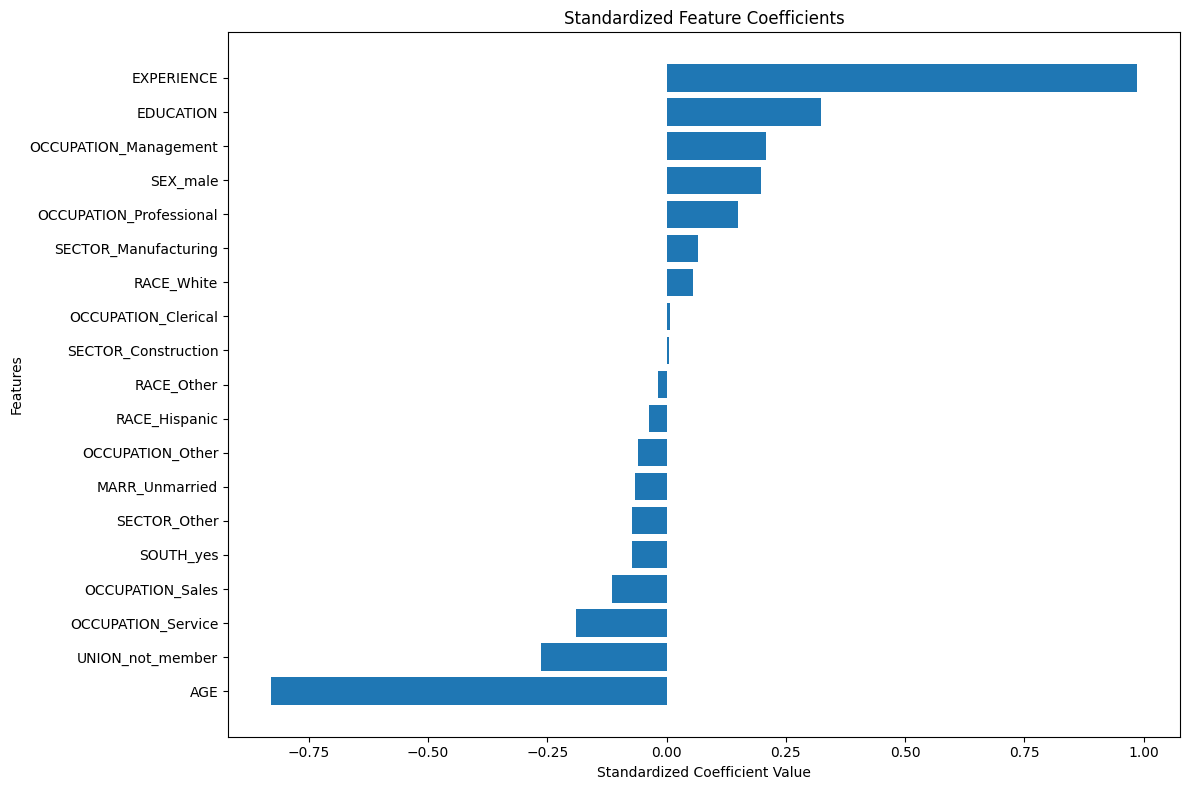

In [137]:
plt.figure(figsize=(12, 8))
plt.barh(y=standardized_coef_df['Feature'], width=standardized_coef_df['Standardized_Coefficient'])
plt.title('Standardized Feature Coefficients')
plt.xlabel('Standardized Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The key differences between regular and standardized coefficients:

Regular coefficients show the change in log(wage) for a one-unit change in the feature
Standardized coefficients show the change in log(wage) for a one-standard-deviation change in the feature

The standardized coefficients provide a better comparison because they account for the different scales of features. For example, a one-unit change in education (years) is very different from a one-unit change in age, but a one-standard-deviation change puts them on the same scale.
This gives us a more meaningful way to compare feature importance, as we can directly compare the magnitude of the standardized coefficients regardless of the original scale of the features.